# Análise de Dados do ENEM Edições 2017, 2018 e 2019
### Parte 2

---
#### Tratamento de Valores Missing (Premissas)

* Os valores missing da coluna "CO_ESCOLA" serão excluídos uma vez que não é possível fazer uma predição 100% certa sobre cógigo da escola (variável categórica)<br><br>

* Assumindo que os participantes fizeram a prova em uma escola que fica no mesmo município em que nasceram, os valores missing da coluna "NO_MUNICIPIO_ESC" serão substituídos pelos valores da coluna "NO_MUNICIPIO_NASCIMENTO".<br><br>

* Assumindo que os participantes fizeram a prova na mesma unidade federativa (Estado) em que nasceram os valores missing da coluna "SG_UF_ESC" serão substituídos pelos valores da coluna "SG_UF_NASCIMENTO".<br><br>

* As colunas que representam as notas terão os valores missing substituídos por 0 (Zero), assumindo que os participantes desistiram de realizar a prova. Neste caso, também poderíamos substituir pela mediana dos dados, mas correríamos o risco de comprometer a veracidade da informação de quantos alunos desistiram de realizar a prova.
---

#### Importando as bibliotecas para análise de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

Importando o arquivo gerado com as edições do ENEM de 2017 até 2019.

In [2]:
dados_enem = pd.read_csv('DADOS/dados_enem_2017_ate_2019.csv',sep=';', encoding='ISO-8859-1')

In [3]:
del dados_enem['Unnamed: 0']

Removendo os valores missing da coluna 'CO_ESCOLA'

In [4]:
dados_enem = dados_enem[dados_enem['CO_ESCOLA'].notna()]

Substituindo os valores missing da coluna "NO_MUNICIPIO_ESC" pelos valores da coluna "NO_MUNICIPIO_NASCIMENTO"

In [5]:
dados_enem['NO_MUNICIPIO_ESC'].combine_first(dados_enem['NO_MUNICIPIO_NASCIMENTO'])

47                    Itacoatiara
84                       Salvador
92                      São Paulo
112         Santa Bárbara d'Oeste
117                         Irecê
                    ...          
17340323                    Posse
17340325    Santa Maria do Suaçuí
17340327             Campo Grande
17340328                 Macarani
17340333                São Paulo
Name: NO_MUNICIPIO_ESC, Length: 4382154, dtype: object

In [6]:
sum(pd.isna(dados_enem['NO_MUNICIPIO_ESC']))

7

Excluindo os 7 valores missing resultandes da coluna "NO_MUNICIPIO_NASCIMENTO", uma vez que não será possível determinar o
nome do município se ele não estiver presente em nenhuma das duas colunas utilizadas

In [7]:
dados_enem = dados_enem[dados_enem['NO_MUNICIPIO_ESC'].notna()]

Substituindo os valores missing da coluna "SG_UF_ESC" pelos valores da coluna "SG_UF_NASCIMENTO" uma vez que não será 
possível determinar a UF se ele não estiver presente em nenhuma das duas colunas utilizadas

In [8]:
dados_enem['SG_UF_ESC'].combine_first(dados_enem['SG_UF_NASCIMENTO'])

47          AM
84          BA
92          SP
112         SP
117         BA
            ..
17340323    GO
17340325    MG
17340327    MS
17340328    BA
17340333    SP
Name: SG_UF_ESC, Length: 4382147, dtype: object

In [9]:
sum(pd.isna(dados_enem['SG_UF_ESC']))

0

Excluindo as colunas 'SG_UF_NASCIMENTO' e 'NO_MUNICIPIO_NASCIMENTO' uma vez que não serão mais utilizadas na análise

In [10]:
del dados_enem['SG_UF_NASCIMENTO']
del dados_enem['NO_MUNICIPIO_NASCIMENTO']

Substituindo os valores missing das colunas de nota por 0 (Zero)
Aqui entendemos que os valores 0 representam participantes que não foram realizar a prova

In [11]:
dados_enem['NU_NOTA_CN'].fillna(0, inplace = True)
dados_enem['NU_NOTA_CH'].fillna(0, inplace = True)
dados_enem['NU_NOTA_LC'].fillna(0, inplace = True)
dados_enem['NU_NOTA_MT'].fillna(0, inplace = True)
dados_enem['NU_NOTA_REDACAO'].fillna(0, inplace = True)

Verificando se ainda há valores missing nas colunas

In [12]:
df_valores_missing = pd.DataFrame(dados_enem.isnull().sum(axis=0), columns = ['QTD_NA'])
df_valores_missing.reset_index(drop=False, inplace=True)
df_valores_missing.rename(columns={'index': 'VAR'}, inplace=True)
percent_missing = [round((df_valores_missing['QTD_NA'][i] / df_valores_missing['QTD_NA'].sum()) * 100, 2) for i in df_valores_missing.index]
df_valores_missing['%_NA'] = percent_missing
df_valores_missing.sort_values(by= '%_NA', ascending=False, inplace=True)
print('\n\nTabela: Quantidade de valores missing presentes no conjunto de dados: \n')
df_valores_missing



Tabela: Quantidade de valores missing presentes no conjunto de dados: 



,VAR,QTD_NA,%_NA
11,Q006,1,100.0
0,NU_INSCRICAO,0,0.0
1,NU_ANO,0,0.0
2,NO_MUNICIPIO_RESIDENCIA,0,0.0
3,CO_ESCOLA,0,0.0
4,NO_MUNICIPIO_ESC,0,0.0
5,SG_UF_ESC,0,0.0
6,NU_NOTA_CN,0,0.0
7,NU_NOTA_CH,0,0.0
8,NU_NOTA_LC,0,0.0


Como ainda há 1 valor missing na coluna "Q006" vamos excluí-lo

In [13]:
dados_enem = dados_enem[dados_enem['Q006'].notna()]

Como não há mais valores missing no conjunto de dados, estamos prontos para analisar os dados.
___

### Pergunta 4 - Qual o número de inscritos por ano? Existe alguma tendência a ser observada nos dados?


 Tabela: Quantidade de inscrições no ENEM por Ano


,ANO,QUANTIDADE_INSCRICOES
0,2017,1785913
1,2018,1448821
2,2019,1147412


None


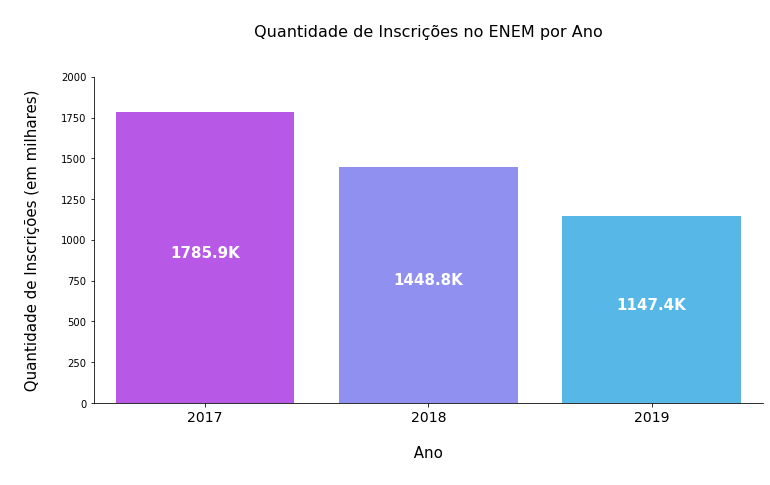

In [14]:
# Tabela

num_insc_ano = dados_enem.groupby(['NU_ANO'], as_index = False).count()[['NU_ANO', 'NU_INSCRICAO']]
num_insc_ano = num_insc_ano.rename(columns={'NU_ANO':'ANO', 'NU_INSCRICAO':'QUANTIDADE_INSCRICOES'})
print('\n Tabela: Quantidade de inscrições no ENEM por Ano')
print(f'{display(num_insc_ano)}')

# Gráfico

fig = plt.figure(figsize=(12,6))
y=[round(num_insc_ano['QUANTIDADE_INSCRICOES'][i]/1000, 1) for i in num_insc_ano.index]
ax = sns.barplot(x=num_insc_ano['ANO'], y=y, palette='cool_r')
ax.set_ylabel('\n Quantidade de Inscrições (em milhares) \n', fontdict={'fontsize':15})
ax.set_xlabel('\n Ano \n', fontdict={'fontsize':15})
ax.set_title('\n Quantidade de Inscrições no ENEM por Ano \n\n', fontdict={'fontsize':16})
ax.set_xticklabels(labels=num_insc_ano['ANO'], fontdict={'fontsize':14})
ax.set_ylim(0, 2000)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i in range(len(y)):
    ax.text(i, y[i]/2, str(round(y[i], 2)) + 'K',
           fontdict={'color':'white', 'fontsize':15, 'weight': 'bold'},
           horizontalalignment='center')


In [15]:
fig.savefig('images/num_insc_ano.PNG', format='PNG', dpi=400)

Tendo como referência apenas os dados de 2017, 2018 e 2019, é possível notar
que o número de inscritos está diminuindo a cada ano que se passa.
___

### Pergunta 5 - Quais as notas médias por ano de realização da prova?

Remodelagem de parte do conjunto de dados para possibilidar a análise de forma gráfica

In [16]:
dados_enem = pd.melt(dados_enem, 
                       id_vars=["NU_INSCRICAO", "NU_ANO",
                                "NO_MUNICIPIO_RESIDENCIA", "NO_MUNICIPIO_ESC",
                                "CO_ESCOLA", "SG_UF_ESC","Q006"], 
                       var_name= ["AREA_CON"], 
                       value_name="NOTAS")

Podemos, agora, ver a nova estrutura da tabela. Precisaremos fazer adequações na coluna "AREA_CON"

In [17]:
dados_enem.head()

,NU_INSCRICAO,NU_ANO,NO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_ESC,CO_ESCOLA,SG_UF_ESC,Q006,AREA_CON,NOTAS
0,170001663652,2017,Itacoatiara,Itacoatiara,13079220.0,AM,P,NU_NOTA_CN,540.7
1,170001664222,2017,Salvador,Salvador,29422418.0,BA,Q,NU_NOTA_CN,396.4
2,170001665543,2017,São Paulo,São Paulo,35001259.0,SP,F,NU_NOTA_CN,452.8
3,170001663747,2017,Santa Bárbara d'Oeste,Santa Bárbara d'Oeste,35925950.0,SP,D,NU_NOTA_CN,496.0
4,170003333557,2017,Lapão,Irecê,29428408.0,BA,B,NU_NOTA_CN,591.1


Adequando o nome das áreas do conhecimento de cada tipo de prova.

In [18]:
dados_enem['AREA_CON'].replace(to_replace='NU_NOTA_CN', value='Ciências da Natureza', inplace=True)
dados_enem['AREA_CON'].replace(to_replace='NU_NOTA_CH', value='Ciências Humanas', inplace=True)
dados_enem['AREA_CON'].replace(to_replace='NU_NOTA_LC', value='Linguagens e Códigos', inplace=True)
dados_enem['AREA_CON'].replace(to_replace='NU_NOTA_MT', value='Matemática', inplace=True)
dados_enem['AREA_CON'].replace(to_replace='NU_NOTA_REDACAO', value='Redação', inplace=True)

Gerando um dataframe temporário para a criação do gráfico de média de notas por ano e por área de conhecimento

In [19]:
df_temp = dados_enem.groupby(['NU_ANO','AREA_CON'], as_index=False).mean()[['NU_ANO','AREA_CON', 'NOTAS']]
df_temp

,NU_ANO,AREA_CON,NOTAS
0,2017,Ciências Humanas,419.253235
1,2017,Ciências da Natureza,393.408171
2,2017,Linguagens e Códigos,411.198615
3,2017,Matemática,402.747386
4,2017,Redação,429.772872
5,2018,Ciências Humanas,463.021001
6,2018,Ciências da Natureza,385.486311
7,2018,Linguagens e Códigos,429.858777
8,2018,Matemática,419.713526
9,2018,Redação,421.093744


Plotando o gráfico com as notas médias por ano e por área de conhecimento

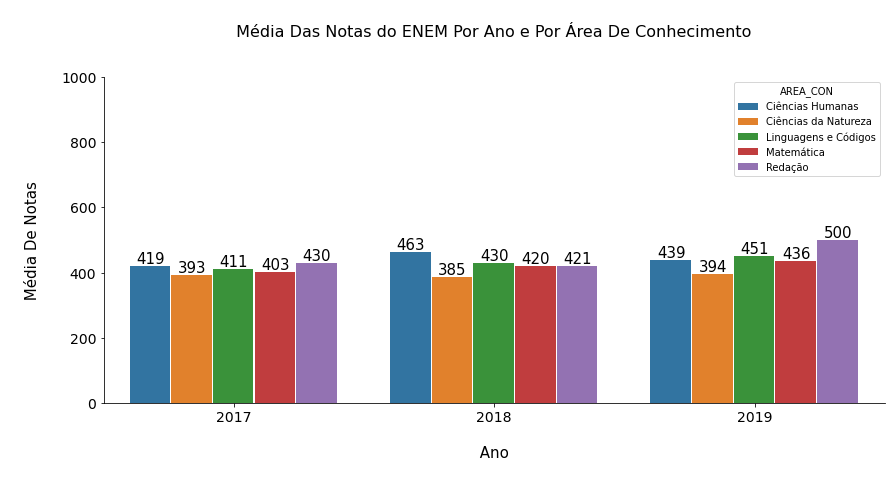

In [20]:
fig = plt.figure(figsize=(14,6))
ax1 = sns.barplot(data=df_temp, x='NU_ANO', y= 'NOTAS', hue='AREA_CON', orient='v')
ax1.set_ylabel('\n Média De Notas \n', fontdict={'fontsize':15})
ax1.set_xlabel('\n Ano \n', fontdict={'fontsize':15})
ax1.set_title('\n Média Das Notas do ENEM Por Ano e Por Área De Conhecimento \n\n', fontdict={'fontsize':16})
ax1.set_xticklabels(labels=['2017', '2018', '2019'], fontdict={'fontsize':14})
ax1.set_yticklabels(labels=range(0, 10001,200 ), fontdict={'fontsize':14})
ax1.set_ylim(0, 1000)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)  
    
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
               (p.get_x() + p.get_width() / 2., p.get_height()), 
               ha = 'center', va = 'center', 
               size=15,
               xytext = (0, 7), 
               textcoords = 'offset points')
    
    p.set_width(0.156)
    

In [21]:
fig.savefig('images/media_notas_ano.PNG', format='PNG', dpi=400)

#### A nota média final dos candidados

In [22]:
notas_por_ano = dados_enem.groupby(['NU_ANO'], as_index=False).mean()[['NU_ANO', 'NOTAS']]
notas_por_ano['NOTAS'] = notas_por_ano['NOTAS'].apply(round)
print('Tabela: Média Total de notas Por Ano')
notas_por_ano

Tabela: Média Total de notas Por Ano


,NU_ANO,NOTAS
0,2017,411
1,2018,424
2,2019,444


Salvando a os dados remodeldos para a próxima análise.

In [23]:
dados_enem.to_csv('DADOS/dados_enem_2017_ate_2019.csv',sep=';', encoding='ISO-8859-1')

In [24]:
del(dados_enem)

###### Esta análise continua no arquivo "analise_enem_parte_3"